In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
sobel_X =  [-1, 0, +1, -2, 0, 2, -1, 0, 1]
sobel_Y =  [1, 2, 1, 0, 0, 0, -1, -2, -1]

src = cv2.imread('./img/sample.png', 0)
height, width = src.shape

# make empty image
def iterConv(dst, x, y, fitler=sobel_X):

    opmem = [0 for i in range(9)] # operation memory

    top = True if y-1 >= 0 else False
    bottom = True if y+1 < height else False
    left = True if x-1 >=0 else False
    right = True if x+1 < width else False

    opmem[0] = dst[y-1, x-1] if top and left else 0 
    opmem[1] = dst[y-1, x] if top else 0
    opmem[2] = dst[y-1, x+1] if top and right else 0
    
    opmem[3] = dst[y, x-1] if left else 0
    opmem[4] = dst[y, x]
    opmem[5] = dst[y, x+1] if right else 0
    
    opmem[6] = dst[y+1, x-1] if bottom and left else 0
    opmem[7] = dst[y+1, x] if bottom else 0
    opmem[8] = dst[y+1, x+1] if bottom and right else 0

    sum = 0
    for i in range(9):
        sum += opmem[i] * fitler[i]

    return sum

def soble(dst):
    output_x = np.zeros((height, width))
    output_y = np.zeros((height, width))

    # iterate sobel operation 
    for y in range(height):
        for x in range(width):
            output_x[y, x] = iterConv(dst, x, y, sobel_X)
            output_y[y, x] = iterConv(dst, x, y, sobel_Y)

    output = abs(output_x) + abs(output_y)
    return output

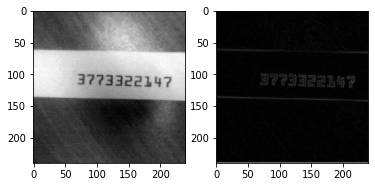

In [3]:
output = soble(src)

plt.subplot(1, 2, 1)
plt.imshow(src, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')